In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv", encoding="latin1")

In [4]:
pd.set_option("display.float_format", "{:.6f}".format)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.000000,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.000000,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.000000,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.000000,80


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [6]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [19]:
df.columns = df.columns.str.strip().str.lower().str.replace("name", "_name")

In [20]:
rename_map = {
    "f_name": "first_name",
    "l_name": "last_name",
    "entryexam": "entry_exam",
    "studyhours": "study_hours",
    "preveducation": "previous_education"
}

df.rename(columns=rename_map, inplace=True)

In [21]:
df.columns

Index(['f______name', 'l______name', 'age', 'gender', 'country', 'residence',
       'entry_exam', 'previous_education', 'study_hours', 'python', 'db'],
      dtype='object')

In [26]:
print(df["gender"].unique())

['Female' 'Other' 'Male']


In [27]:
gender_map = {
    "f": "Female", "female": "Female", "Female": "Female",
    "m": "Male", "male": "Male", "Male": "Male"
}
df["gender"] = df["gender"].map(lambda x: gender_map.get(str(x).strip(), "Other"))

In [28]:
print(df["gender"].unique())

['Female' 'Other' 'Male']


In [30]:
df.loc[df.gender=="Other"]

,f______name,l______name,age,gender,country,residence,entry_exam,previous_education,study_hours,python,db
1,Alex,Walekhwa,60,Other,Kenya,Private,79,Diploma,150,60.000000,75
3,Shoni,Hlongwane,22,Other,Rsa,Sognsvann,40,High School,120,NaN,44


In [32]:
df.gender.value_counts()

gender
Female    42
Male      33
Other      2
Name: count, dtype: int64

In [33]:
print(df["previous_education"].unique())

['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [37]:
df["previous_education"] = (
    df["previous_education"]
    .str.strip()
    .str.lower()
    .replace({"highschool": "high school"})
    .replace({"diplomaaa": "diploma"})
    .replace({"barrrchelors": "bachelors"})
    .str.title()
)

In [38]:
df["previous_education"].value_counts()

previous_education
Bachelors      25
High School    19
Masters        16
Diploma        12
Doctorate       5
Name: count, dtype: int64

In [39]:
print(df["country"].unique())

['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']


In [41]:
df["country"] = (
    df["country"]
    .str.strip()
    .str.lower()
    .replace({"norge": "norway"})
    .replace({"rsa": "south africa"})
    .replace({"somali": "somalia"})
    .str.title()
)

In [42]:
print(df["country"].unique())

['Norway' 'Kenya' 'Uganda' 'South Africa' 'Denmark' 'Netherlands' 'Italy'
 'Spain' 'Uk' 'Somalia' 'Nigeria' 'Germany' 'France']


In [45]:
df["country"] = df["country"].replace({"Uk": "UK"})

In [46]:
print(df["country"].unique())

['Norway' 'Kenya' 'Uganda' 'South Africa' 'Denmark' 'Netherlands' 'Italy'
 'Spain' 'UK' 'Somalia' 'Nigeria' 'Germany' 'France']


In [47]:
df["residence"].value_counts()

residence
Private         33
BI Residence    29
Sognsvann       12
BI-Residence     1
BIResidence      1
BI_Residence     1
Name: count, dtype: int64

In [48]:
df["residence"] = (
    df["residence"]
    .str.strip()
    .replace({"BI-Residence": "BI Residence"})
    .replace({"BIResidence": "BI Residence"})
    .replace({"BI_Residence": "BI Residence"})
)

In [49]:
df["residence"].value_counts()

residence
Private         33
BI Residence    32
Sognsvann       12
Name: count, dtype: int64

In [53]:
df["python"] = df["python"].fillna(df["python"].median())

In [54]:
numeric_expect = ["age", "entry_exam", "study_hours", "python", "db"]
for col in numeric_expect:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   f______name         77 non-null     object 
 1   l______name         77 non-null     object 
 2   age                 77 non-null     int64  
 3   gender              77 non-null     object 
 4   country             77 non-null     object 
 5   residence           77 non-null     object 
 6   entry_exam          77 non-null     int64  
 7   previous_education  77 non-null     object 
 8   study_hours         77 non-null     int64  
 9   python              77 non-null     float64
 10  db                  77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [58]:
numeric_cols = list(df.select_dtypes(include=[np.number]).columns)
categorical_cols = list(df.select_dtypes(include=["category"]).columns)

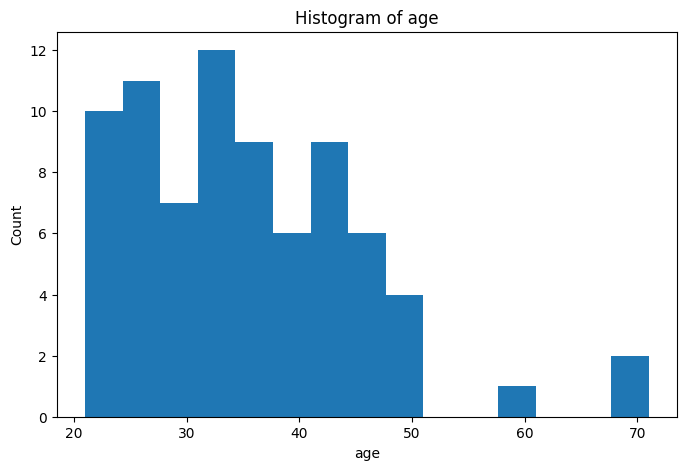

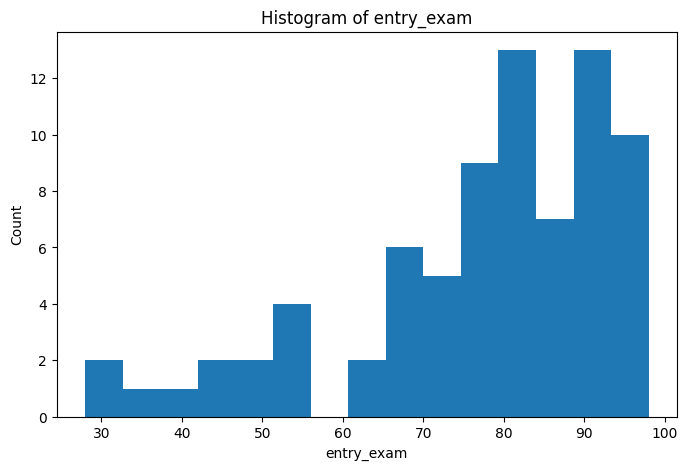

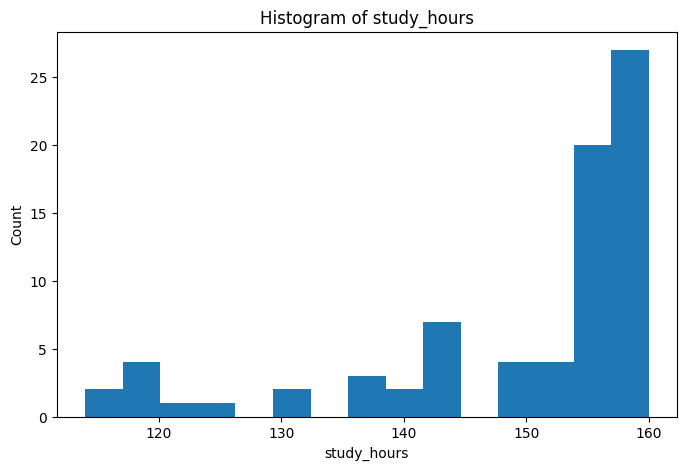

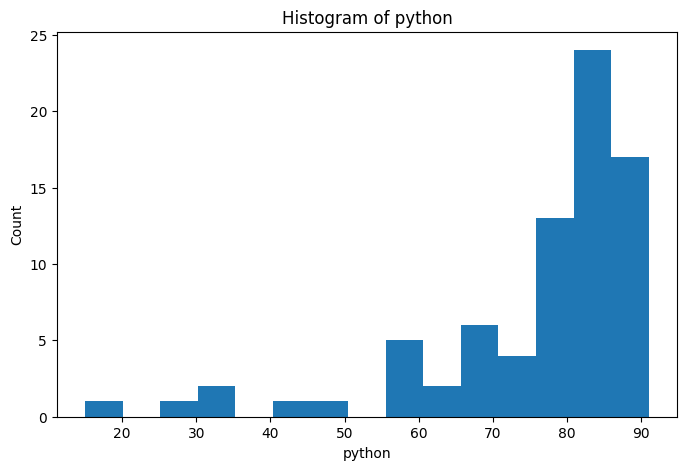

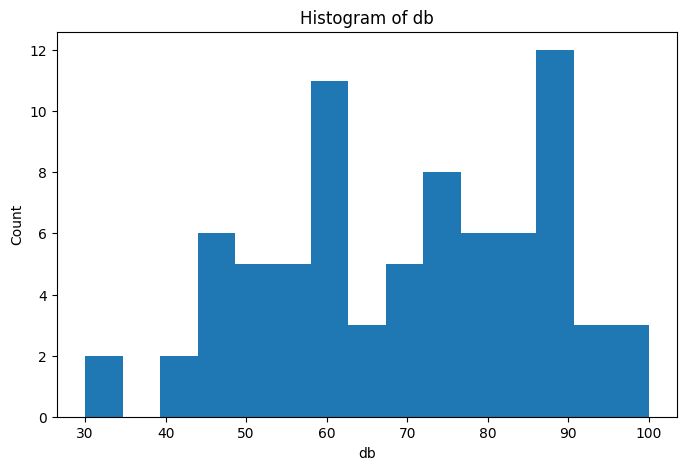

In [59]:
for col in numeric_cols:
    fig = plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=15)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

In [62]:
categorical_cols = ['gender', 'country', 'residence', 'previous_education']

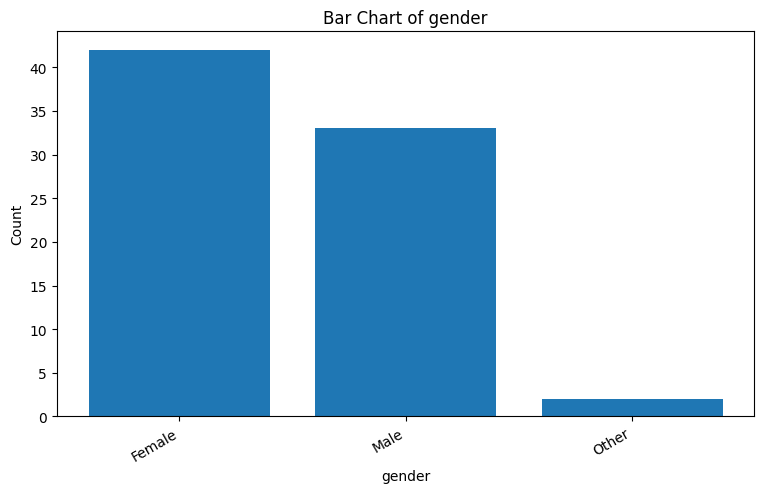

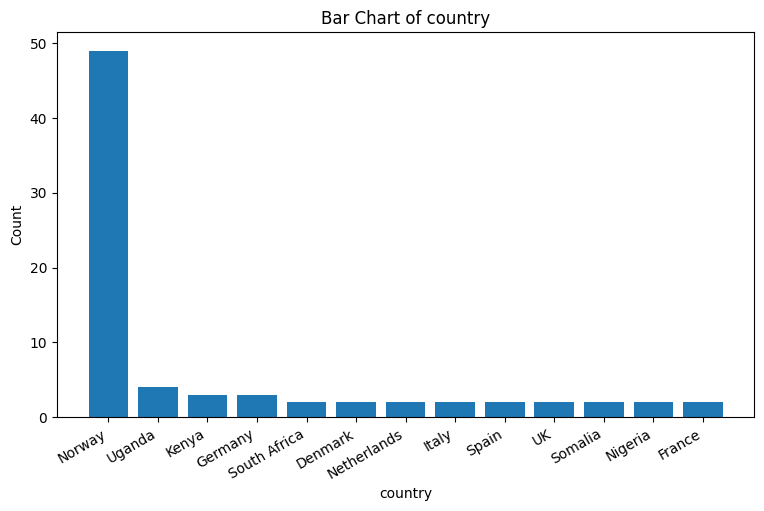

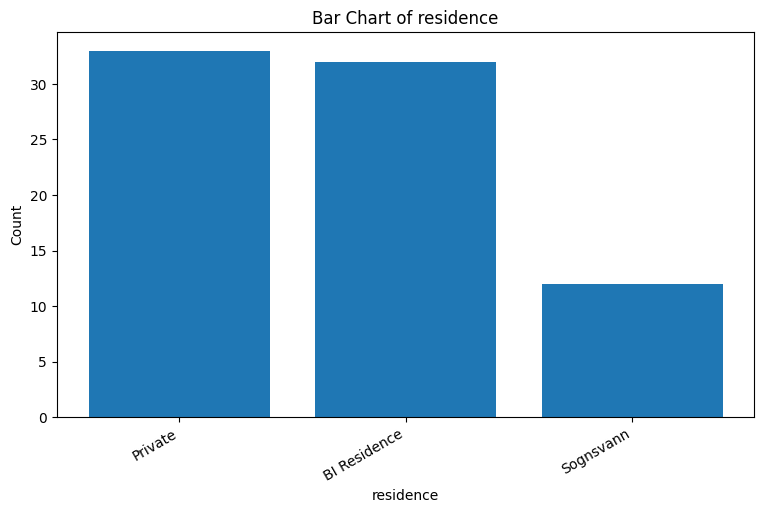

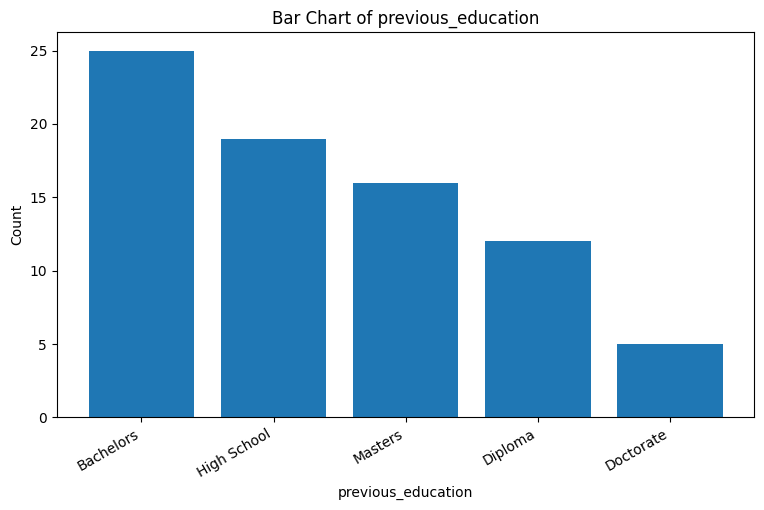

In [63]:
for col in categorical_cols:
    counts = df[col].value_counts()
    fig = plt.figure(figsize=(9, 5))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.xticks(rotation=30, ha="right")
    plt.show()

##

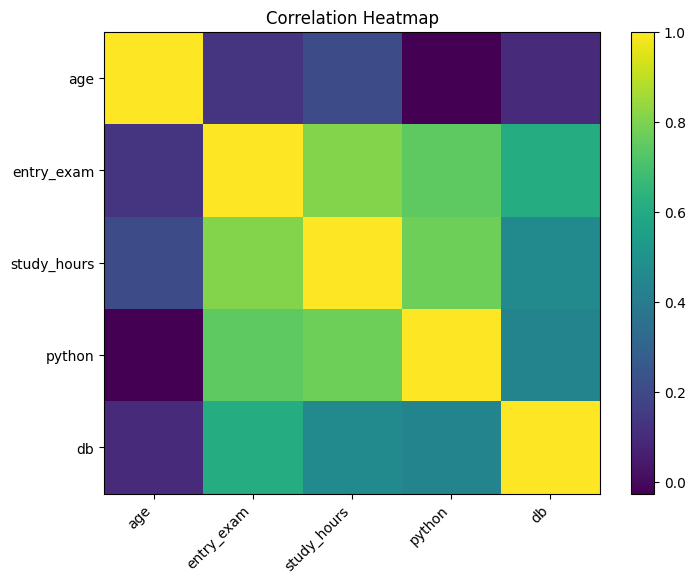

In [65]:
corr = df[numeric_cols].corr()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
cax = ax.imshow(corr.values, aspect="auto")
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=45, ha="right")
ax.set_yticklabels(numeric_cols)
plt.title("Correlation Heatmap")
fig.colorbar(cax)
plt.show()

In [67]:
for cat in categorical_cols:
    df[cat] = pd.Categorical(df[cat], ordered=True)

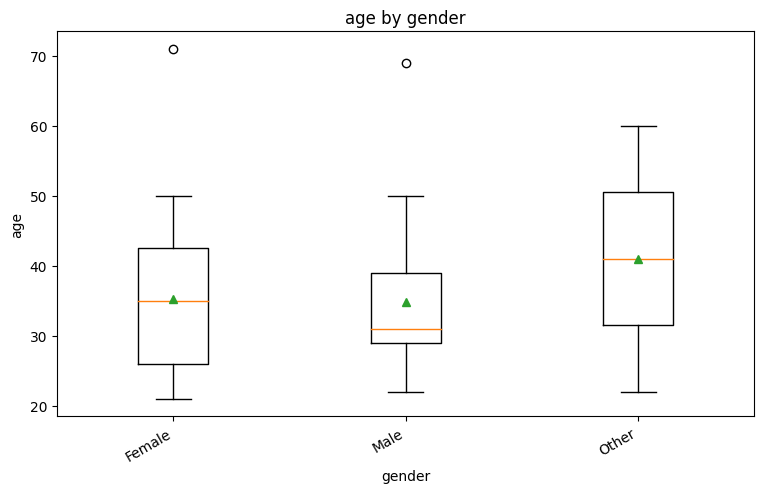

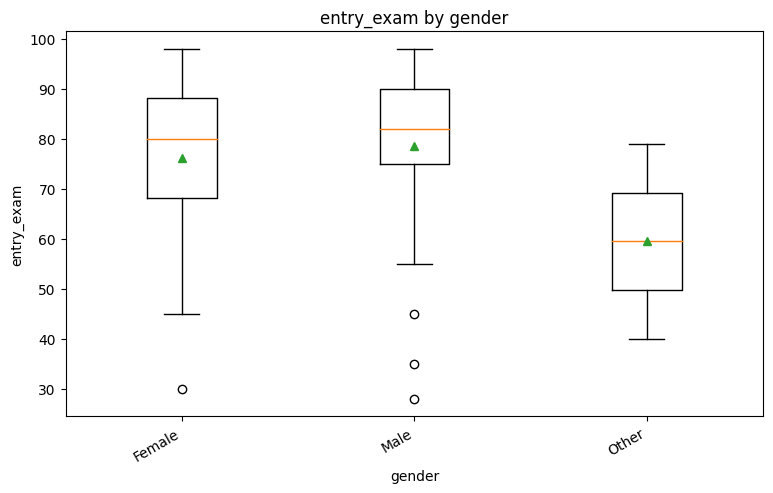

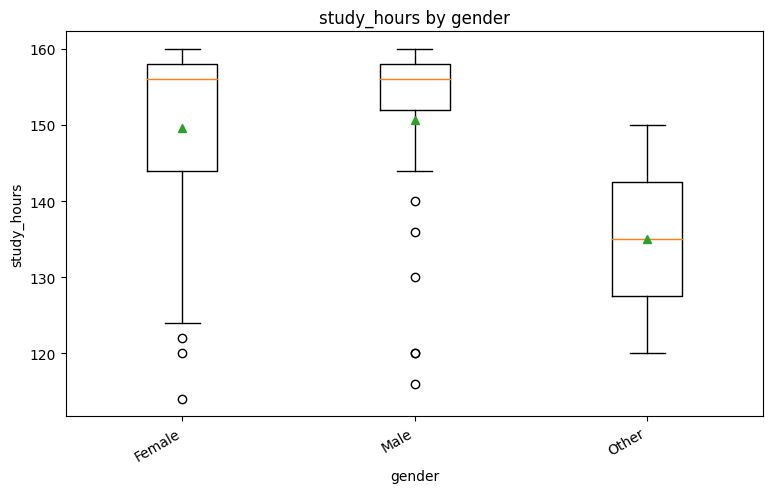

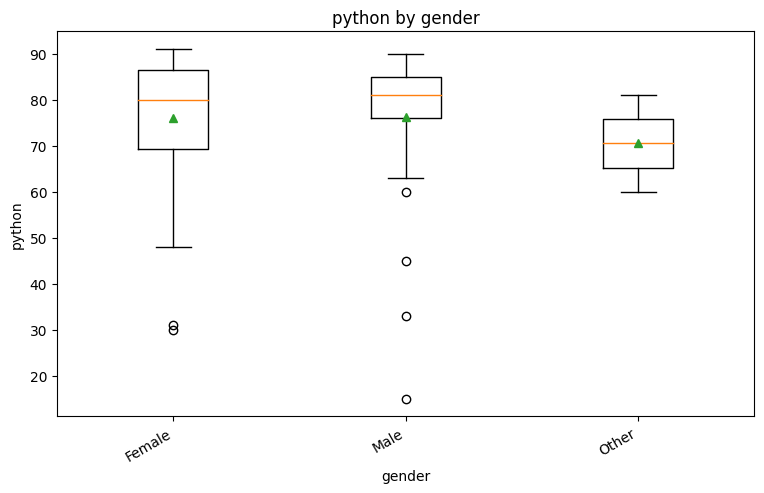

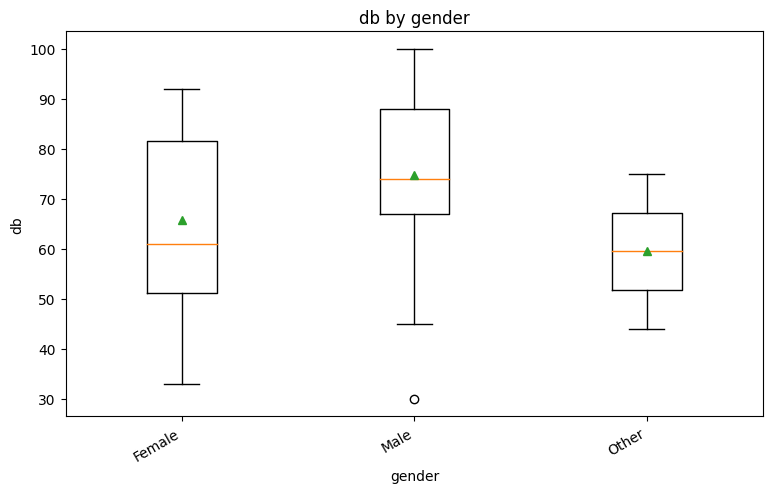

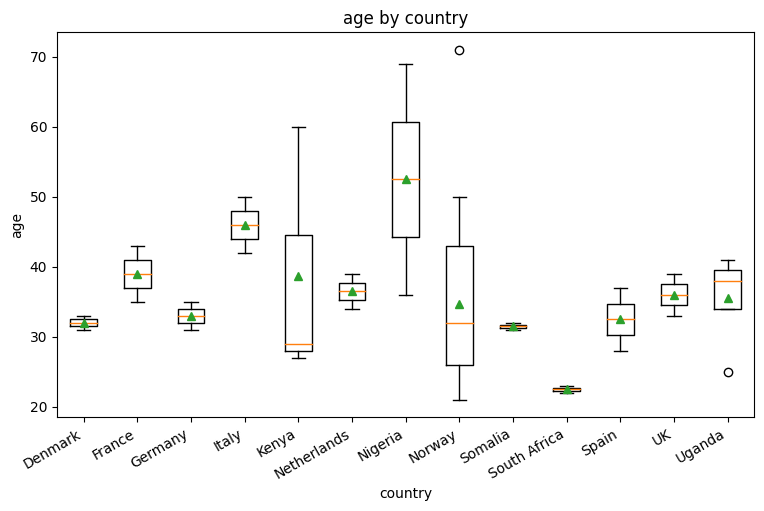

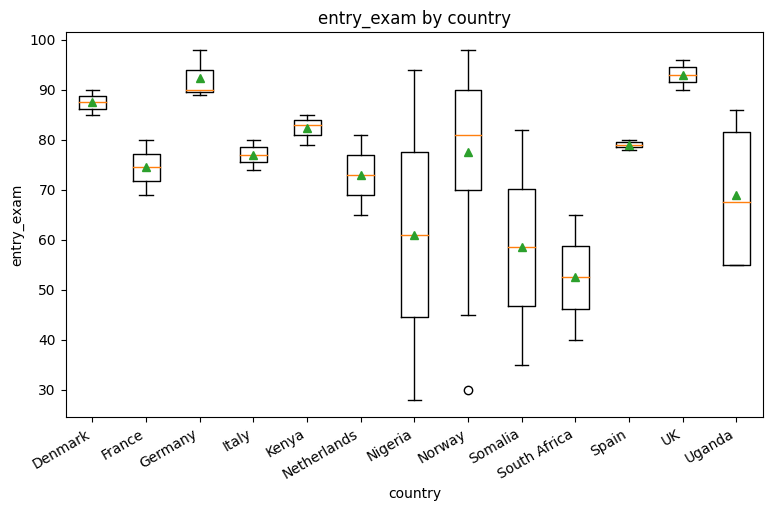

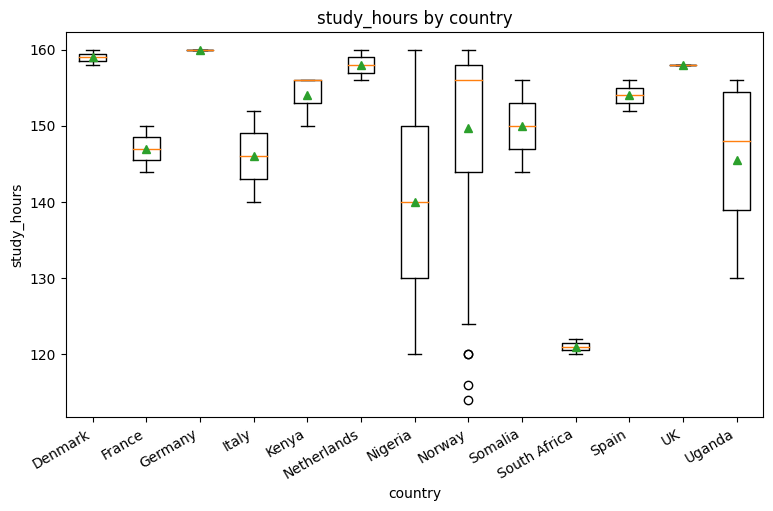

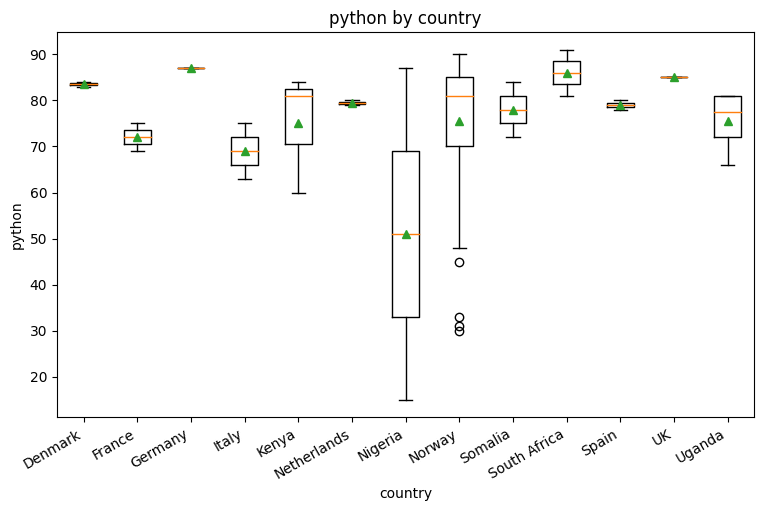

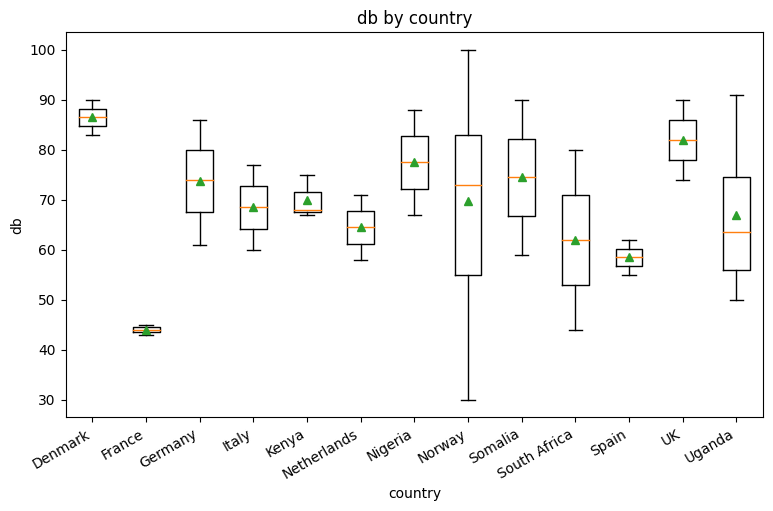

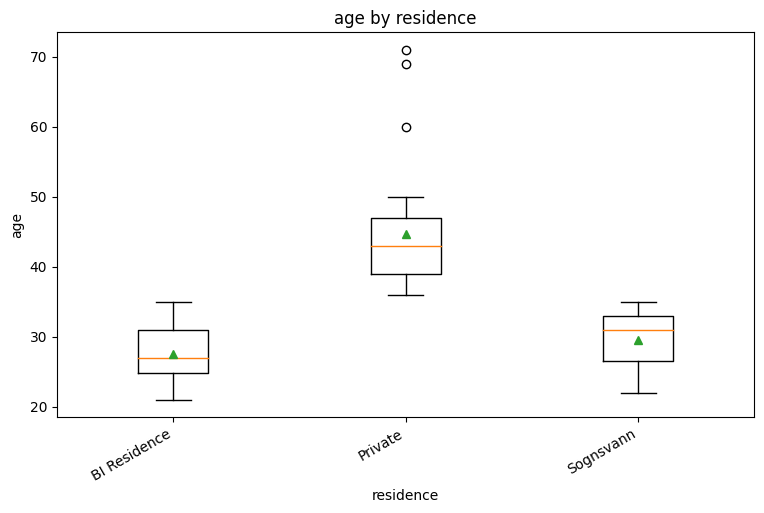

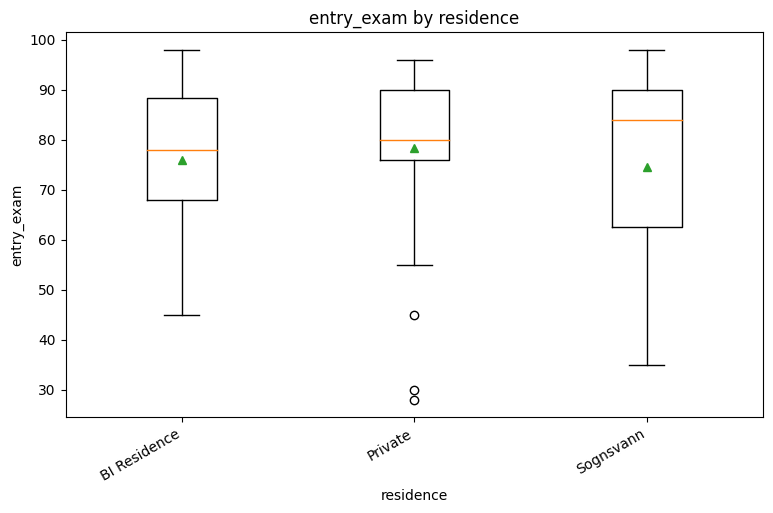

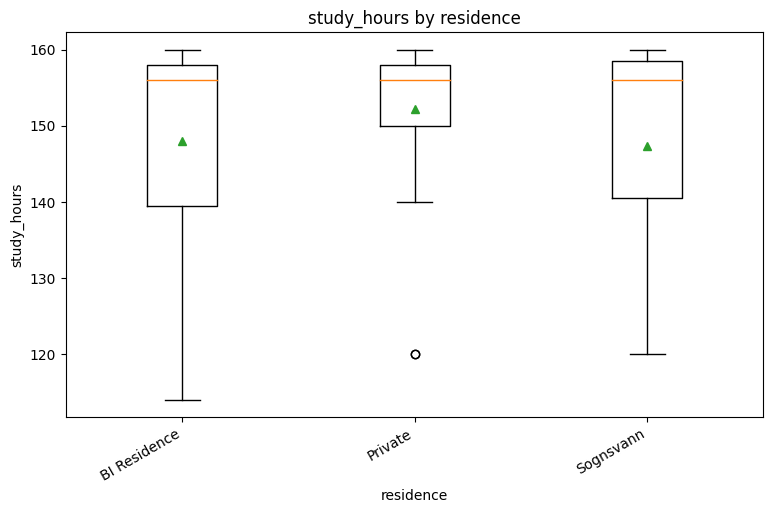

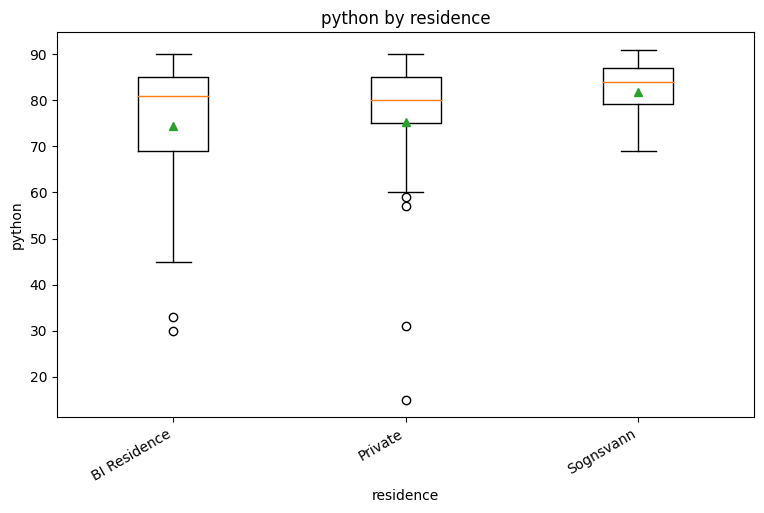

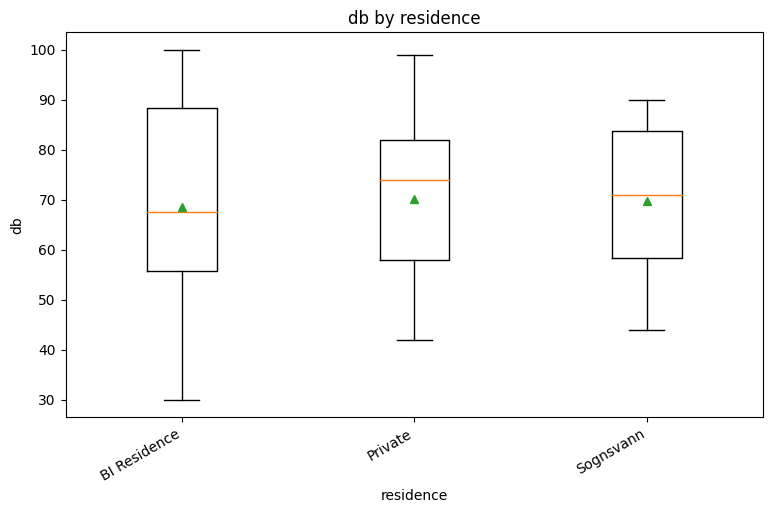

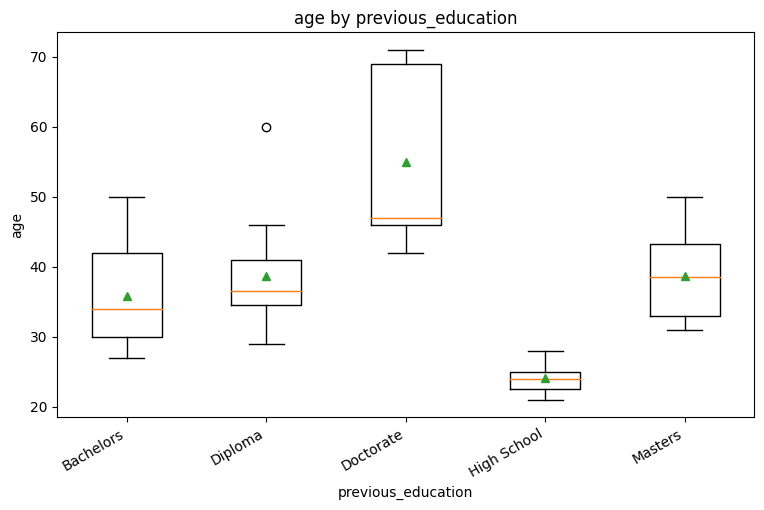

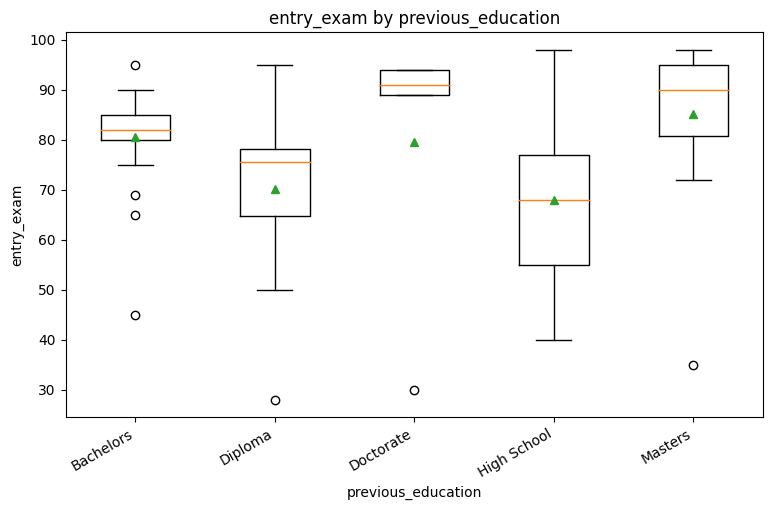

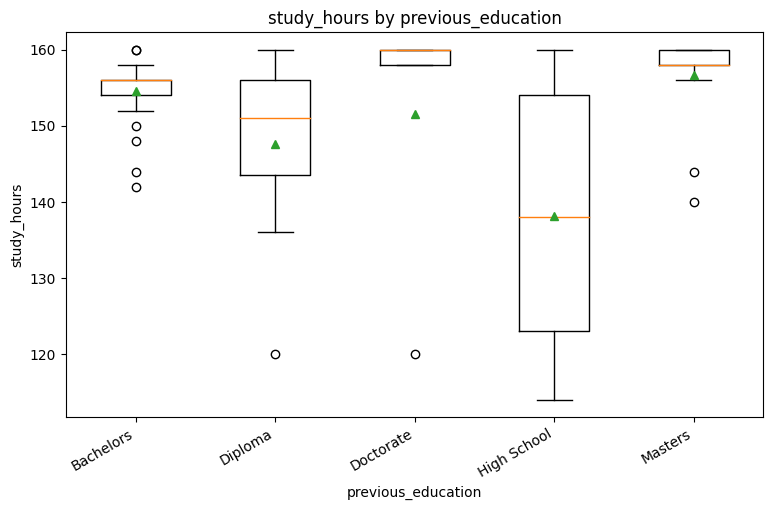

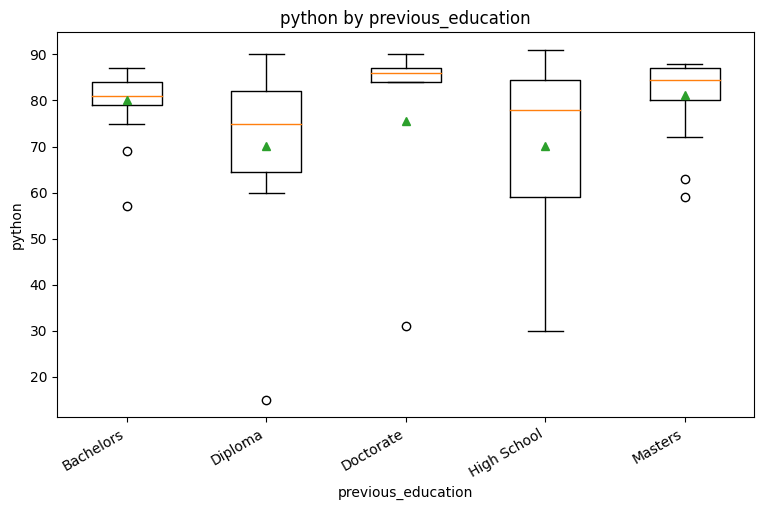

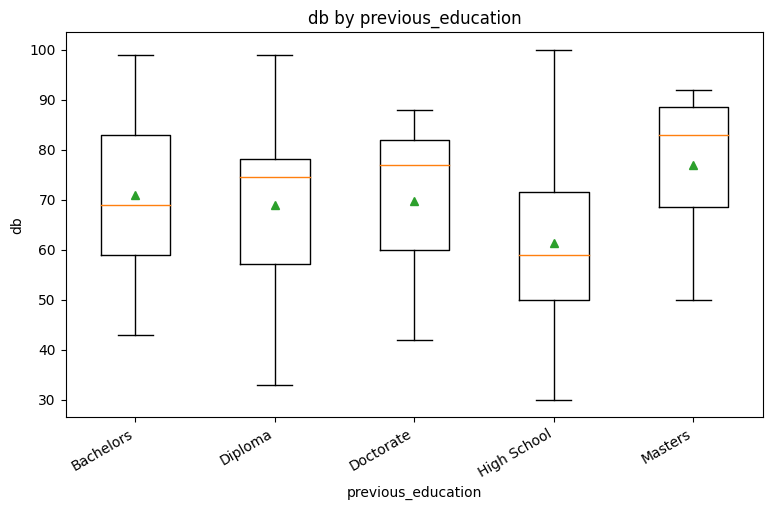

In [68]:
for cat in categorical_cols:
    for num in numeric_cols:
        groups = [g.dropna().values for _, g in df.groupby(cat, observed=False)[num]]
        labels = [str(k) for k in df[cat].cat.categories]
        if len(groups) == len(labels) and len(labels) > 1:
            fig = plt.figure(figsize=(9, 5))
            plt.boxplot(groups, labels=labels, showmeans=True)
            plt.title(f"{num} by {cat}")
            plt.xlabel(cat); plt.ylabel(num)
            plt.xticks(rotation=30, ha="right")